# Sommaire :
 
**<a href="#C1"> I.) LES ALGORITHMES </a>**
  - <a href ="#C11"> 1.1) La Méthode K-means </a>
  - <a href ="#C12"> 1.2) La méthode DBSCAN </a>
  - <a href ="#C13"> 1.3) La méthode agglomerative clustering </a>
 
 
**<a href="#C2"> II.)  ANALYSE DES GROUPES DE CLUSTERS </a>**
 - <a href ="#C21"> 2.1.) Analyse des groupes par ANOVA </a>
 - <a href ="#C21"> 2.2.)  Analyse des groupes avec les statistiques descriptives </a>
 - <a href ="#C23"> 2.3.) Analyse graphique des groupes du clustering </a>
 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

# Visualisation graphique
import matplotlib.pyplot as plt
import seaborn as sns

# MODELISATION
from sklearn.cluster import KMeans                   # Modèle Kmeans
from sklearn.cluster import DBSCAN                   # modèle DBSCAN
from sklearn.cluster import AgglomerativeClustering  # Modèle Agglomerative clustering
from sklearn.metrics import silhouette_score         # le score silhouette

In [2]:
data = pd.read_csv('data')
data.head()

,customer_unique_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,871766c5855e863f6eccc05f988b23cb,-0.453173,-0.475505,0.908050,-0.198068,1.982270,-1.692184,-0.218758,-0.570270
1,eb28e67c4c0b83846050ddfb8a35d051,0.563502,3.187697,2.066192,3.404257,1.274128,0.622491,-0.392839,-2.069185
2,3818d81c6709e39d06b2738a8d3a2474,0.318968,0.335463,-0.733735,-0.975728,0.005529,-0.745319,-0.194401,-0.192341
3,af861d436cfc08b2c2ddefd0ba074622,0.373827,-1.228459,1.049602,-0.339624,-0.995308,-0.327800,-0.064375,-0.065938
4,64b576fb70d441e8f1b2d7d446e483c5,-0.167254,0.000962,0.349539,-0.149792,-0.201059,1.940684,-0.518369,-2.227760


In [3]:
DATA = pd.read_csv('DATA.csv')
DATA.head()

,customer_unique_id,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,Home_Cooking,IT_office,Others_categories,Sports_Leisures,Toy_Children_Babies
0,871766c5855e863f6eccc05f988b23cb,RJ,1,72.19,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,eb28e67c4c0b83846050ddfb8a35d051,SP,2,284.56,4.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3818d81c6709e39d06b2738a8d3a2474,MG,1,216.87,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,af861d436cfc08b2c2ddefd0ba074622,SP,1,25.78,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64b576fb70d441e8f1b2d7d446e483c5,SP,1,218.04,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
DATA = DATA.drop(['customer_unique_id','IT_office','Others_categories','Sports_Leisures','Home_Cooking',
                    'Toy_Children_Babies'], axis=1)
DATA.head()

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets
0,RJ,1,72.19,5.0,0.0,0.0,1.0,0.0,0.0,0.0
1,SP,2,284.56,4.5,1.0,0.0,1.0,0.0,0.0,1.0
2,MG,1,216.87,5.0,0.0,0.0,1.0,0.0,0.0,0.0
3,SP,1,25.78,4.0,0.0,0.0,1.0,0.0,1.0,0.0
4,SP,1,218.04,5.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
DATA.shape

(92444, 10)

In [6]:
# utiliser toutes les variables à l'exception de l'ID client
X = data.iloc[:,1:]
X.head() 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.453173,-0.475505,0.908050,-0.198068,1.982270,-1.692184,-0.218758,-0.570270
1,0.563502,3.187697,2.066192,3.404257,1.274128,0.622491,-0.392839,-2.069185
2,0.318968,0.335463,-0.733735,-0.975728,0.005529,-0.745319,-0.194401,-0.192341
3,0.373827,-1.228459,1.049602,-0.339624,-0.995308,-0.327800,-0.064375,-0.065938
4,-0.167254,0.000962,0.349539,-0.149792,-0.201059,1.940684,-0.518369,-2.227760


In [7]:
X.shape

(92444, 8)

# <a name="C1"> I.) LES ALGORITHMES <a/>

## <a name="C11"> 1.1) La Méthode K-means <a/>
### Modélisation

#### clusters = 3

In [8]:
from sklearn.cluster import KMeans

# Utiliser  clusters
kmeans = KMeans(n_clusters=3)

# entrainer
kmeans.fit(X)

# Prédire
y_kmeans = kmeans.predict(X)

In [9]:
y_kmeans

array([0, 2, 0, ..., 0, 0, 0])

#### Personnalisation des clusters

In [10]:
#  nous allons utiliser des lettres plutôt que des nombres:
cluster = {i:j for i,j in enumerate(list("abcd"))}
cluster

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

In [11]:
labels = [cluster[i] for i in y_kmeans]

In [12]:
# Stocker les clusters dans une nouvelle colonne de la data
DATA['cluster'] = labels

In [13]:
# Compter le nombre de client par classe
DATA['cluster'].value_counts()

a    51289
b    28626
c    12529
Name: cluster, dtype: int64

In [14]:
# Afficher 
DATA.sample(5)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
69169,SP,1,32.77,5.0,0.0,0.0,1.0,0.0,0.0,0.0,a
7859,RS,2,225.51,4.0,0.0,0.0,2.0,0.0,0.0,0.0,a
48854,MG,2,58.84,5.0,0.0,0.0,2.0,0.0,2.0,0.0,b
45116,DF,1,187.89,1.0,0.0,1.0,0.0,0.0,0.0,0.0,c
52510,SP,1,52.71,4.0,0.0,0.0,1.0,0.0,0.0,0.0,a


#### Qualité du clustering

In [15]:
from sklearn.metrics import silhouette_score

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X ,y_kmeans)
print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : 0.24349824159448302


Le clustering ,n'est pas de bonne qualité

#### Trouver une valeur de k optimale

##### Utiliser la methode du coude

In [16]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(2, 24)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

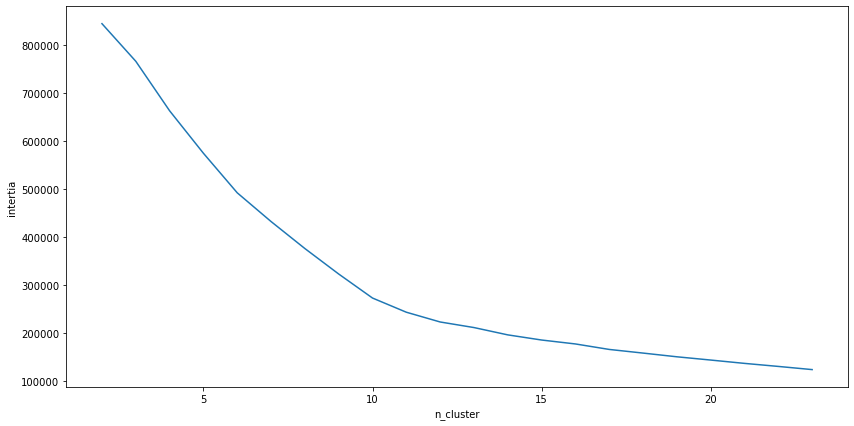

In [17]:
# Affichons les résultats
fig, ax = plt.subplots(1,1,figsize=(14,7))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

La cassure se produit à **k = 10**

In [18]:
DATA = DATA.drop('cluster', axis=1)

##### clusters = 10

In [19]:
# Utiliser 10 clusters
kmeans = KMeans(n_clusters=10)

# entrainer
kmeans.fit(X)

# Prédire
y_kmeans = kmeans.predict(X)

# calcler l'inertie
kmeans.inertia_

276131.1305519712

In [20]:
# Personnaliser les noms des clusters
cluster_names = ['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D', 'Cluster E', 'Cluster F','Cluster G', 'Cluster H',
                'Cluster I','Cluster J']
labels = [cluster_names[label] for label in y_kmeans]

In [21]:
# Stocker les clusters dans une nouvelle colonne de la data
DATA['cluster'] = labels

In [22]:
# Compter le nombre de client par classe
DATA['cluster'].value_counts()

Cluster B    21436
Cluster C    18648
Cluster D    15157
Cluster A     7363
Cluster G     6855
Cluster F     6669
Cluster E     6063
Cluster I     5562
Cluster H     2383
Cluster J     2308
Name: cluster, dtype: int64

In [23]:
# Afficher 
DATA.head()

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
0,RJ,1,72.19,5.0,0.0,0.0,1.0,0.0,0.0,0.0,Cluster B
1,SP,2,284.56,4.5,1.0,0.0,1.0,0.0,0.0,1.0,Cluster H
2,MG,1,216.87,5.0,0.0,0.0,1.0,0.0,0.0,0.0,Cluster B
3,SP,1,25.78,4.0,0.0,0.0,1.0,0.0,1.0,0.0,Cluster C
4,SP,1,218.04,5.0,0.0,0.0,1.0,0.0,0.0,1.0,Cluster E


In [24]:
# Afficher 
DATA.sample(5)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
19614,SP,1,43.72,5.0,0.0,0.0,1.0,1.0,0.0,0.0,Cluster I
84165,SP,1,118.88,5.0,0.0,0.0,1.0,0.0,0.0,0.0,Cluster B
6755,SP,1,139.56,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Cluster B
69921,RJ,1,55.83,5.0,0.0,0.0,1.0,0.0,1.0,0.0,Cluster C
59048,MA,1,361.07,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Cluster C


#### Qualité du clustering

In [25]:
from sklearn.metrics import silhouette_score

# Calculer le score de silhouette
silhouette_avg = silhouette_score(X ,y_kmeans)
print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : 0.6270766962446574


## <a name="C12"> 1.2) La méthode DBSCAN <a/>

In [26]:
DATAS = DATA.drop('cluster', axis=1)

### Choix des hyperparamètres

In [27]:
from sklearn.cluster import DBSCAN

# Rechercher les hyperparamètres optimaux
eps_range = [0.1, 0.3, 0.6, 0.8, 1]
min_samples_range = [2000, 4000, 6000, 8000, 10000]

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        print(f"eps={eps}, min_samples={min_samples}, n_clusters={n_clusters}")

eps=0.1, min_samples=2000, n_clusters=7
eps=0.1, min_samples=4000, n_clusters=3
eps=0.1, min_samples=6000, n_clusters=1
eps=0.1, min_samples=8000, n_clusters=0
eps=0.1, min_samples=10000, n_clusters=0
eps=0.3, min_samples=2000, n_clusters=8
eps=0.3, min_samples=4000, n_clusters=5
eps=0.3, min_samples=6000, n_clusters=3
eps=0.3, min_samples=8000, n_clusters=3
eps=0.3, min_samples=10000, n_clusters=3
eps=0.6, min_samples=2000, n_clusters=9
eps=0.6, min_samples=4000, n_clusters=7
eps=0.6, min_samples=6000, n_clusters=3
eps=0.6, min_samples=8000, n_clusters=3
eps=0.6, min_samples=10000, n_clusters=3
eps=0.8, min_samples=2000, n_clusters=9
eps=0.8, min_samples=4000, n_clusters=7
eps=0.8, min_samples=6000, n_clusters=4
eps=0.8, min_samples=8000, n_clusters=3
eps=0.8, min_samples=10000, n_clusters=3
eps=1, min_samples=2000, n_clusters=9
eps=1, min_samples=4000, n_clusters=8
eps=1, min_samples=6000, n_clusters=4
eps=1, min_samples=8000, n_clusters=3
eps=1, min_samples=10000, n_clusters=3


nous observons de façon récurrente le nombre de cluster 3 et 9

### Modélisation

#### *cluster = 3 : DBSCAN (eps = 1, min_samples = 8000)* #### 

In [28]:
from sklearn.cluster import DBSCAN

# création d'un objet dbscan avec paramètres (eps : rayon de voisinnage)
dbscan = DBSCAN(eps=1, min_samples=8000)

# ajustement du modèle sur les données
dbscan.fit(X)

labels_db = dbscan.labels_

In [29]:
labels_db

array([-1, -1,  0, ..., -1,  2,  0], dtype=int64)

###### Qualité du clustering

In [30]:
# Calculer le score de silhouette
silhouette_avg = silhouette_score(X ,labels_db)
print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : 0.34904864261290974


#### *cluster = 9 : DBSCAN (eps = 0.6, min_samples = 2000)*

In [31]:
# création d'un objet dbscan avec paramètres (eps : rayon de voisinnage)
dbscan = DBSCAN(eps=0.6, min_samples=2000)

# ajustement du modèle sur les données
dbscan.fit(X)

labels_db = dbscan.labels_

In [32]:
# Stocker les clusters dans une nouvelle colonne de la data
DATAS['cluster'] = labels_db

# Compter le nombre de client par classe
DATAS['cluster'].value_counts()

 2    17497
 1    17196
-1    15648
 4    14215
 5     6154
 6     5856
 3     4479
 8     4351
 0     3964
 7     3084
Name: cluster, dtype: int64

#### Qualité du clustering

In [33]:
# Calculer le score de silhouette
silhouette_avg = silhouette_score(X ,labels_db)
print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : 0.6468783179820067


## <a name="C13"> 1.3) La méthode agglomerative clustering <a/>

### Modélisation
#### L'implémentation parallèle

L'implémentation parallèle de l'algorithme de clustering agglomératif est une méthode pour réduire la quantité de RAM utilisée par l'algorithme en distribuant le calcul sur plusieurs processeurs. Cette approche peut être particulièrement utile pour les grands ensembles de données où la quantité de mémoire disponible est limitée.

In [34]:
# Les librairies
from sklearn.cluster import AgglomerativeClustering
from joblib import Parallel, delayed

In [35]:
X1 = X
X2 = X

In [36]:
DATAS = DATAS.drop('cluster', axis=1)

#### clusters = 3

In [37]:
# création d'un objet AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)

# fonction pour ajuster le modèle sur un sous-ensemble de données
def fit_model(X_subset):
    clustering.fit(X_subset)
    return clustering.labels_

# ajustement du modèle sur les données en utilisant l'implémentation parallèle
labels = Parallel(n_jobs=-1)(delayed(fit_model)(X[i:i+1000]) for i in range(0, 92444, 1000))

# fusion des résultats de clustering
final_labels = np.concatenate(labels)

# suppression des données d'entraînement pour libérer de la mémoire
del X

In [38]:
final_labels

array([0, 2, 0, ..., 0, 2, 0], dtype=int64)

In [39]:
# Calculer le score de silhouette
silhouette_avg = silhouette_score(X1 ,final_labels)
print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : 0.0033780422319205044


#### clusters = 10

In [40]:
# création d'un objet AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=10)

# fonction pour ajuster le modèle sur un sous-ensemble de données
def fit_model(X1_subset):
    clustering.fit(X1_subset)
    return clustering.labels_

# ajustement du modèle sur les données en utilisant l'implémentation parallèle
labels = Parallel(n_jobs=-1)(delayed(fit_model)(X1[i:i+1000]) for i in range(0, 92444, 1000))

# fusion des résultats de clustering
final_labels = np.concatenate(labels)

# suppression des données d'entraînement pour libérer de la mémoire
del X1

In [41]:
final_labels

array([1, 2, 1, ..., 0, 5, 6], dtype=int64)

In [42]:
# Stocker les clusters dans une nouvelle colonne de la data
DATAS['cluster'] = final_labels

# Compter le nombre de client par classe
DATAS['cluster'].value_counts()

7    11672
6    10510
8    10295
5    10257
9     9754
0     9611
4     7739
1     7708
2     7526
3     7372
Name: cluster, dtype: int64

In [43]:
# Calculer le score de silhouette
silhouette_avg = silhouette_score(X2 ,final_labels)
print("Score de silhouette moyen :", silhouette_avg)

Score de silhouette moyen : -0.10397964859064623


L'algorihme présente le meilleur silhouette. Il sera donc utiliser pour faire nos segmentation

#  <a name="C2"> II.) ANALYSE DES GROUPES DE CLUSTERS <a/>

In [44]:
# Compter le nombre de client par classe
DATA['cluster'].value_counts()

Cluster B    21436
Cluster C    18648
Cluster D    15157
Cluster A     7363
Cluster G     6855
Cluster F     6669
Cluster E     6063
Cluster I     5562
Cluster H     2383
Cluster J     2308
Name: cluster, dtype: int64

## <a name="C21"> 2.1) Analyse des groupes d'un clustering par ANOVA <a/>

L'analyse de la variance (ANOVA), dans le contexte de l'analyse des groupes d'un clustering, nous permettra déterminer si les groupes de notre clustering sont significativement différents les uns des autres en termes de valeurs moyennes pour chaque variable. A cet effet, nous allons calcule la valeur **F-value** et la valeur **P-value**


In [45]:
from scipy import stats

# effectuer l'ANOVA pour chaque variable
for var in DATA.columns[1:9]:
    group1 = DATA.loc[DATA['cluster'] == 'Cluster A', var]
    group2 = DATA.loc[DATA['cluster'] == 'Cluster B', var]
    group3 = DATA.loc[DATA['cluster'] == 'Cluster C', var]
    group4 = DATA.loc[DATA['cluster'] == 'Cluster D', var]
    group5 = DATA.loc[DATA['cluster'] == 'Cluster E', var]
    group6 = DATA.loc[DATA['cluster'] == 'Cluster F', var]
    group7 = DATA.loc[DATA['cluster'] == 'Cluster G', var]
    group8 = DATA.loc[DATA['cluster'] == 'Cluster H', var]
    group9 = DATA.loc[DATA['cluster'] == 'Cluster I', var]
   
    f_value, p_value = stats.f_oneway(group1, group2, group3)
    print('Variable {}: F-value = {:.2f}, p-value = {:.4f}'.format(var, f_value, p_value))

Variable order_count: F-value = 388.66, p-value = 0.0000
Variable total_spent: F-value = 659.93, p-value = 0.0000
Variable average_score: F-value = 8.50, p-value = 0.0002
Variable large: F-value = 5.45, p-value = 0.0043
Variable medium: F-value = 2786.48, p-value = 0.0000
Variable small: F-value = 793.23, p-value = 0.0000
Variable Automotive_Industry: F-value = 27.26, p-value = 0.0000
Variable Beauty_Health_Wellness: F-value = 400485.82, p-value = 0.0000


Si la p-value est inférieure à un certain seuil (généralement 0,05), cela indique que les groupes sont statistiquement différents . Si la p-value est supérieure à ce seuil, cela indique que les groupes ne sont pas statistiquement différents.

Les groupes sont statistiquement différents l'un des autres

## <a name="C22"> 2.2) Analyse des groupes avec les statistiques descriptives <a/>

In [46]:
# Analyse des segments 
Cluster_A = DATA[DATA['cluster'] == 'Cluster A']
Cluster_B = DATA[DATA['cluster'] == 'Cluster B']
Cluster_C = DATA[DATA['cluster'] == 'Cluster C']
Cluster_D = DATA[DATA['cluster'] == 'Cluster D']
Cluster_E = DATA[DATA['cluster'] == 'Cluster E']
Cluster_F = DATA[DATA['cluster'] == 'Cluster F']
Cluster_G = DATA[DATA['cluster'] == 'Cluster G']
Cluster_H = DATA[DATA['cluster'] == 'Cluster H']
Cluster_I = DATA[DATA['cluster'] == 'Cluster I']
Cluster_J = DATA[DATA['cluster'] == 'Cluster J']

In [47]:
Cluster_A.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,7363,7363.00,7363.00,7363.00,7363.00,7363.00,7363.00,7363.00,7363.00,7363.00,7363
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster A
freq,3054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7363
mean,NaN,1.06,148.54,4.20,0.00,0.14,0.92,0.00,0.01,0.00,NaN
std,NaN,0.26,150.80,1.24,0.02,0.35,0.43,0.04,0.08,0.04,NaN
min,NaN,1.00,11.63,1.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,1.00,62.64,4.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN
50%,NaN,1.00,101.73,5.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN
75%,NaN,1.00,169.14,5.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN


In [48]:
Cluster_B.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,21436,21436.00,21436.00,21436.00,21436.0,21436.00,21436.00,21436.0,21436.00,21436.0,21436
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster B
freq,9533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21436
mean,NaN,1.01,117.87,4.16,0.0,0.00,1.00,0.0,0.00,0.0,NaN
std,NaN,0.07,95.42,1.26,0.0,0.06,0.04,0.0,0.03,0.0,NaN
min,NaN,1.00,13.78,1.00,0.0,0.00,1.00,0.0,0.00,0.0,NaN
25%,NaN,1.00,61.78,4.00,0.0,0.00,1.00,0.0,0.00,0.0,NaN
50%,NaN,1.00,96.22,5.00,0.0,0.00,1.00,0.0,0.00,0.0,NaN
75%,NaN,1.00,143.02,5.00,0.0,0.00,1.00,0.0,0.00,0.0,NaN


In [49]:
Cluster_C.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,18648,18648.00,18648.00,18648.00,18648.0,18648.00,18648.00,18648.0,18648.00,18648.0,18648
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster C
freq,7685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18648
mean,NaN,1.04,170.83,4.21,0.0,0.00,1.04,0.0,1.04,0.0,NaN
std,NaN,0.19,186.82,1.25,0.0,0.03,0.19,0.0,0.19,0.0,NaN
min,NaN,1.00,9.59,1.00,0.0,0.00,1.00,0.0,1.00,0.0,NaN
25%,NaN,1.00,66.59,4.00,0.0,0.00,1.00,0.0,1.00,0.0,NaN
50%,NaN,1.00,112.92,5.00,0.0,0.00,1.00,0.0,1.00,0.0,NaN
75%,NaN,1.00,197.34,5.00,0.0,0.00,1.00,0.0,1.00,0.0,NaN


In [50]:
Cluster_D.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,15157,15157.00,15157.00,15157.00,15157.0,15157.00,15157.00,15157.0,15157.00,15157.00,15157
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster D
freq,5996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15157
mean,NaN,1.04,124.64,4.13,0.0,0.00,1.04,0.0,0.01,0.00,NaN
std,NaN,0.20,173.86,1.29,0.0,0.05,0.19,0.0,0.08,0.01,NaN
min,NaN,1.00,10.07,1.00,0.0,0.00,1.00,0.0,0.00,0.00,NaN
25%,NaN,1.00,40.77,4.00,0.0,0.00,1.00,0.0,0.00,0.00,NaN
50%,NaN,1.00,68.70,5.00,0.0,0.00,1.00,0.0,0.00,0.00,NaN
75%,NaN,1.00,142.31,5.00,0.0,0.00,1.00,0.0,0.00,0.00,NaN


In [51]:
Cluster_E.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,6063,6063.00,6063.00,6063.00,6063.00,6063.00,6063.00,6063.00,6063.00,6063.00,6063
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster E
freq,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6063
mean,NaN,1.06,166.97,4.21,0.00,0.21,0.85,0.00,0.00,1.04,NaN
std,NaN,0.25,198.11,1.23,0.02,0.42,0.46,0.03,0.07,0.21,NaN
min,NaN,1.00,13.38,1.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,1.00,69.97,4.00,0.00,0.00,1.00,0.00,0.00,1.00,NaN
50%,NaN,1.00,115.16,5.00,0.00,0.00,1.00,0.00,0.00,1.00,NaN
75%,NaN,1.00,173.91,5.00,0.00,0.00,1.00,0.00,0.00,1.00,NaN


In [52]:
Cluster_F.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,6669,6669.00,6669.00,6669.00,6669.00,6669.00,6669.00,6669.00,6669.00,6669.00,6669
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster F
freq,2866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6669
mean,NaN,1.07,139.75,4.23,0.00,0.01,1.06,0.00,0.01,0.00,NaN
std,NaN,0.27,131.86,1.22,0.02,0.09,0.25,0.05,0.10,0.05,NaN
min,NaN,1.00,13.36,1.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,1.00,64.59,4.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN
50%,NaN,1.00,106.72,5.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN
75%,NaN,1.00,163.32,5.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN


In [53]:
Cluster_G.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,6855,6855.00,6855.00,6855.0,6855.0,6855.00,6855.00,6855.00,6855.00,6855.00,6855
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster G
freq,2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6855
mean,NaN,1.03,259.25,4.1,0.0,1.02,0.00,0.00,0.05,0.00,NaN
std,NaN,0.16,226.92,1.3,0.0,0.15,0.07,0.02,0.21,0.05,NaN
min,NaN,1.00,26.58,1.0,0.0,1.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,1.00,140.47,4.0,0.0,1.00,0.00,0.00,0.00,0.00,NaN
50%,NaN,1.00,192.09,5.0,0.0,1.00,0.00,0.00,0.00,0.00,NaN
75%,NaN,1.00,293.10,5.0,0.0,1.00,0.00,0.00,0.00,0.00,NaN


In [54]:
Cluster_H.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,2383,2383.00,2383.00,2383.00,2383.00,2383.00,2383.00,2383.00,2383.00,2383.00,2383
unique,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster H
freq,1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2383
mean,NaN,1.11,717.42,3.97,0.92,0.08,0.11,0.08,0.08,0.09,NaN
std,NaN,0.38,920.85,1.41,0.35,0.33,0.38,0.28,0.28,0.30,NaN
min,NaN,1.00,26.28,1.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,1.00,239.24,3.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,NaN,1.00,423.98,5.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN
75%,NaN,1.00,839.68,5.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN


In [55]:
Cluster_I.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,5562,5562.00,5562.00,5562.00,5562.00,5562.00,5562.00,5562.00,5562.00,5562.00,5562
unique,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster I
freq,2322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5562
mean,NaN,1.05,174.03,4.12,0.00,0.17,0.88,1.03,0.01,0.00,NaN
std,NaN,0.24,230.19,1.29,0.01,0.39,0.43,0.18,0.08,0.04,NaN
min,NaN,1.00,10.89,1.00,0.00,0.00,0.00,1.00,0.00,0.00,NaN
25%,NaN,1.00,60.36,4.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN
50%,NaN,1.00,117.76,5.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN
75%,NaN,1.00,184.13,5.00,0.00,0.00,1.00,1.00,0.00,0.00,NaN


In [56]:
Cluster_J.describe(include='all').round(2)

,customer_state,order_count,total_spent,average_score,large,medium,small,Automotive_Industry,Beauty_Health_Wellness,DIY_Garden_Pets,cluster
count,2308,2308.00,2308.00,2308.00,2308.00,2308.00,2308.00,2308.00,2308.00,2308.00,2308
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cluster J
freq,1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2308
mean,NaN,2.52,539.50,3.59,0.01,0.10,2.41,0.04,0.32,0.09,NaN
std,NaN,0.97,627.85,1.51,0.12,0.35,0.98,0.24,0.85,0.46,NaN
min,NaN,2.00,35.94,1.00,0.00,0.00,1.00,0.00,0.00,0.00,NaN
25%,NaN,2.00,211.72,2.33,0.00,0.00,2.00,0.00,0.00,0.00,NaN
50%,NaN,2.00,364.44,4.00,0.00,0.00,2.00,0.00,0.00,0.00,NaN
75%,NaN,3.00,605.86,5.00,0.00,0.00,3.00,0.00,0.00,0.00,NaN


## <a name="C23"> 2.3.) Analyse graphique des groupes du clustering <a/>

Affichons le nuage de points par paire de variables

In [57]:
data = DATA.drop(['customer_state','cluster'], axis =1)

In [58]:
import seaborn as sns
from sklearn.manifold import TSNE

# Appliquer l'algorithme t-SNE sur le DataFrame
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(data)

# Créer un DataFrame avec les coordonnées t-SNE
tsne_df = pd.DataFrame(tsne_data, columns=['Dim 1', 'Dim 2'])

# Ajouter une colonne 'Label' au DataFrame
tsne_df['cluster'] =  DATA['cluster']
tsne_df

C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\dmedc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,Dim 1,Dim 2,cluster
0,-51.491501,15.409832,Cluster B
1,-6.330078,40.520119,Cluster H
2,-40.646858,37.453766,Cluster B
3,10.676552,-22.060276,Cluster C
4,-38.493317,40.311329,Cluster E
...,...,...,...
92439,14.360235,-49.801544,Cluster G
92440,40.084793,-16.068138,Cluster G
92441,-22.595852,-45.012577,Cluster F
92442,-63.863094,8.793694,Cluster D


In [59]:
len(np.unique(final_labels))


10

In [60]:
final_labels

array([1, 2, 1, ..., 0, 5, 6], dtype=int64)

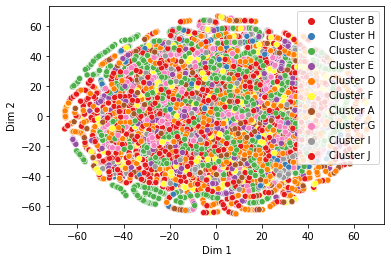

In [61]:

# Définir une palette de couleurs personnalisée
custom_palette = sns.color_palette('Set1', len(np.unique(final_labels)))

# # Transformer la colonne 'clusters' en array
# clusters = tsne_df['cluster'].values
# clusters

# Tracer le scatter plot des coordonnées t-SNE en personnalisant la couleur des clusters
sns.scatterplot(x='Dim 1', y='Dim 2', hue='cluster', palette=custom_palette, data=tsne_df)

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

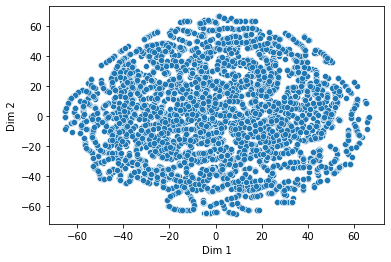

In [62]:
# Tracer le scatter plot du cluster A
tsne_df_A = tsne_df.loc[tsne_df['cluster'] == "Cluster A", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_A)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

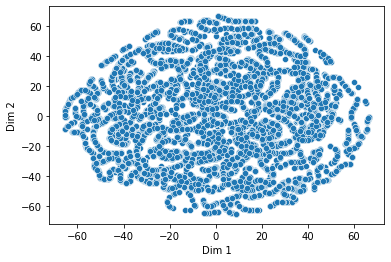

In [63]:
# Tracer le scatter plot du cluster B
tsne_df_B = tsne_df.loc[tsne_df['cluster'] == "Cluster B", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_B)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

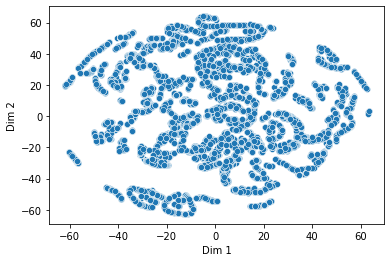

In [64]:
# Tracer le scatter plot du cluster C
tsne_df_C = tsne_df.loc[tsne_df['cluster'] == "Cluster C", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_C)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

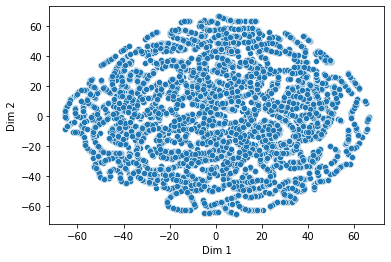

In [65]:
# Tracer le scatter plot du cluster D
tsne_df_D = tsne_df.loc[tsne_df['cluster'] == "Cluster D", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_D)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

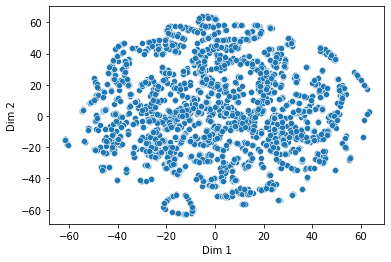

In [66]:
# Tracer le scatter plot du cluster E
tsne_df_E = tsne_df.loc[tsne_df['cluster'] == "Cluster E", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_E)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

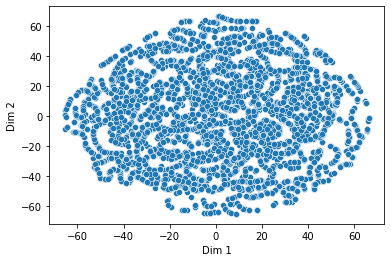

In [67]:
# Tracer le scatter plot du cluster F
tsne_df_F = tsne_df.loc[tsne_df['cluster'] == "Cluster F", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_F)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

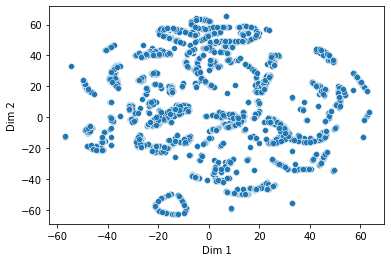

In [68]:
# Tracer le scatter plot du cluster G
tsne_df_G = tsne_df.loc[tsne_df['cluster'] == "Cluster G", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_G)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

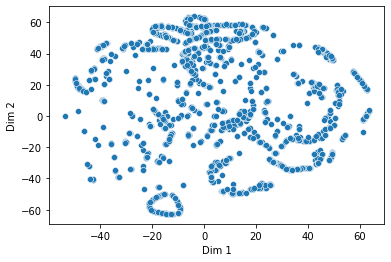

In [69]:
# Tracer le scatter plot du cluster H
tsne_df_H = tsne_df.loc[tsne_df['cluster'] == "Cluster H", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_H)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

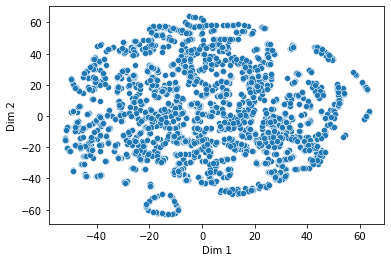

In [70]:
# Tracer le scatter plot du cluster I
tsne_df_I = tsne_df.loc[tsne_df['cluster'] == "Cluster I", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_I)

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

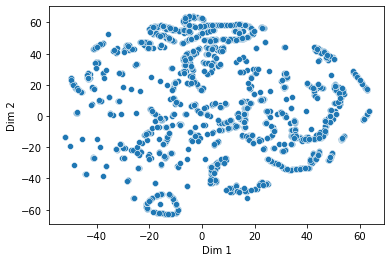

In [71]:
# Tracer le scatter plot du cluster J
tsne_df_J = tsne_df.loc[tsne_df['cluster'] == "Cluster J", :]
 
sns.scatterplot(x='Dim 1', y='Dim 2', data=tsne_df_J)

### Conlusion des analyses

Les groupes A et J présentent plus d'intérêt commercial